In [29]:
import pandas as pd

In [30]:
df=pd.read_csv('blackfriday_train.csv')

In [31]:
df.shape


(550068, 12)

In [32]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [33]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [34]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [35]:
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [36]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
len(df.User_ID.unique())

5891

Only 5891 unique people purchased.

(array([135809.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 414259.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

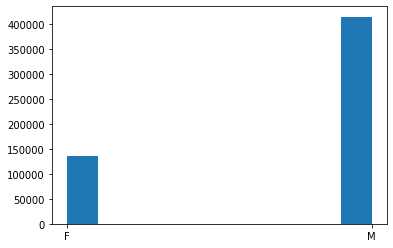

In [39]:
plt.hist(df.Gender)

In [40]:
df.Gender. value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

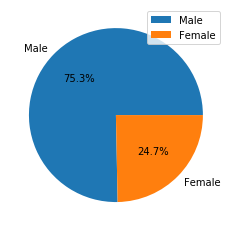

In [41]:
plt.pie(df.Gender. value_counts(), labels=['Male','Female'], autopct='%1.1f%%')
plt.legend()
plt.show()

This is not the correct male-female percentage ratio.

In [42]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [43]:
df1= df.drop(['Product_ID', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], axis=1)

In [44]:
df1.head()

,User_ID,Gender,Purchase
0,1000001,F,8370
1,1000001,F,15200
2,1000001,F,1422
3,1000001,F,1057
4,1000002,M,7969


In [45]:
df2=df1.groupby(['User_ID','Gender'], as_index='true').agg('sum')

df2

,,Purchase
User_ID,Gender,
1000001,F,334093
1000002,M,810472
1000003,M,341635
1000004,M,206468
1000005,M,821001
...,...,...
1006036,F,4116058
1006037,F,1119538
1006038,F,90034


In [46]:
df2.reset_index(inplace=True)

In [47]:
df2.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


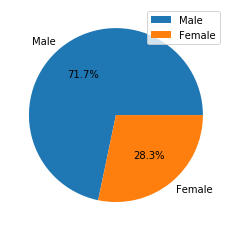

In [48]:
plt.pie(df2.Gender. value_counts(), labels=['Male','Female'], autopct='%1.1f%%')
plt.legend()
plt.show()

Almost 28% shoppers were female.

In [49]:
df3=df2.groupby(['Gender'], as_index='false').agg('sum')
df3

,User_ID,Purchase
Gender,,
F,1671208584,1186232642
M,4237610433,3909580100


In [50]:
df3.reset_index(inplace=True)

In [51]:
df3.head()

,Gender,User_ID,Purchase
0,F,1671208584,1186232642
1,M,4237610433,3909580100


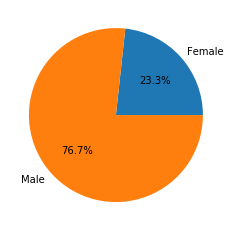

In [52]:
plt.pie(df3.Purchase,labels=['Female','Male'], autopct='%1.1f%%')
plt.show()

28% of the shoppers were female, but only 23% of the money was spent by female. It means avergae spending by men were more.

<BarContainer object of 2 artists>

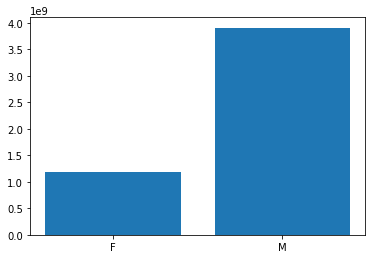

In [53]:
plt.bar(df3.Gender, df3.Purchase)

In [54]:
df1.groupby(['Gender']).mean()

,User_ID,Purchase
Gender,,
F,1.003130e+06,8734.565765
M,1.002996e+06,9437.526040


This is the average spending by male and female. On an average male spent RS. 700 more compared to females.

In [55]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [58]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [61]:
df4=df.groupby(['Age']).mean()
df4.reset_index(inplace=True)
df4

,Age,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,1.002722e+06,8.761025,0.000000,5.083764,9.030334,11.845885,8933.464640
1,18-25,1.002801e+06,6.736384,0.211880,5.111088,9.470278,12.391142,9169.663606
2,26-35,1.003113e+06,7.896975,0.392970,5.314272,9.811388,12.647127,9252.690633
3,36-45,1.003066e+06,8.837365,0.396644,5.494242,9.954625,12.750849,9331.350695
4,46-50,1.003190e+06,8.517078,0.722326,5.742194,10.176459,12.939958,9208.625697
5,51-55,1.002985e+06,8.810109,0.718475,5.774214,10.281663,13.105320,9534.808031
6,55+,1.002986e+06,9.502697,0.633417,6.066313,10.464882,13.151577,9336.280459


Avergae spending by all age group is almost equal and it is around Rs.9000.

<BarContainer object of 7 artists>

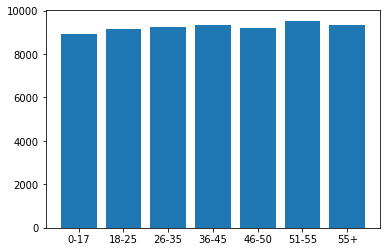

In [63]:
plt.bar(df4.Age, df4.Purchase)

<BarContainer object of 7 artists>

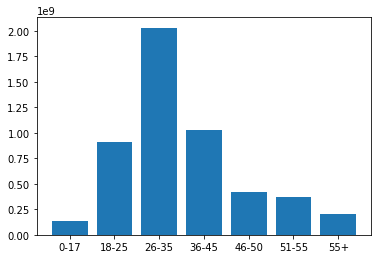

In [67]:
df5=df.groupby(['Age']).agg('sum')
df5.reset_index(inplace=True)
plt.bar(df5.Age, df5.Purchase)

Most of the money was spent by age-group 26-35.

In [68]:
df5

,Age,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,15143112813,132309,0,76775,96155.0,57725.0,134913183
1,18-25,99939196632,671348,21116,509371,654936.0,388041.0,913848675
2,26-35,220270500414,1734073,86291,1166945,1473278.0,846624.0,2031770578
3,36-45,110350311441,972225,43636,604438,750081.0,424412.0,1026569884
4,46-50,45846804203,389239,33011,262424,315572.0,173059.0,420843403
5,51-55,38615925320,339198,27662,222313,267570.0,146334.0,367099644
6,55+,21568218459,204346,13621,130450,147356.0,77134.0,200767375


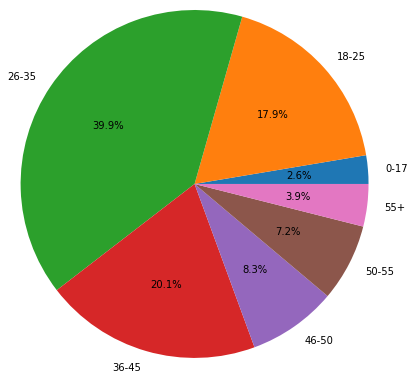

In [72]:
plt.pie(df5.Purchase, labels=['0-17','18-25', '26-35', '36-45','46-50', '50-55', '55+'], radius=2, autopct='%1.1f%%')
plt.show()

Almost 40% of the money was spent by age group 25-35. Almost 78% of the money was spent by age group, 18-45.

In [73]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [74]:
df.Marital_Status.unique()

array([0, 1], dtype=int64)

In [76]:
df6=df.groupby('Marital_Status').agg('sum')
df6.reset_index(inplace=True)
df6

,Marital_Status,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,325705005668,2579917,1733758,2185357.0,1255425.0,3008927447
1,1,226029063614,1862821,1238958,1519591.0,857904.0,2086885295


<BarContainer object of 2 artists>

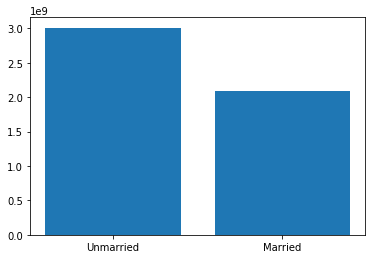

In [81]:
plt.xticks(df6.Marital_Status,['Unmarried', 'Married'])
plt.bar(df6.Marital_Status, df6.Purchase)

In [82]:
df.groupby('Marital_Status').mean()

,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Marital_Status,,,,,,
0,1.002999e+06,7.944782,5.339059,9.778627,12.602265,9265.907619
1,1.003071e+06,8.266823,5.498245,9.935409,12.766049,9261.174574


Avergae spent by both married and unmarried people is eqaul.

In [85]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [88]:
df7=df.groupby('City_Category').agg('sum')
df7.reset_index(inplace=True)
df7

,City_Category,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,A,148154546085,1156406,56547,813387,977988.0,526424.0,1316471661
1,B,231882421590,1846444,94452,1242828,1549399.0,877512.0,2115533605
2,C,171697101607,1439888,74338,916501,1177561.0,709393.0,1663807476


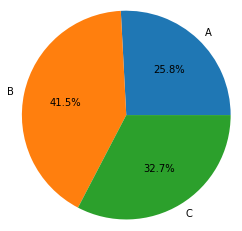

In [89]:
plt.pie(df7.Purchase, labels=['A','B', 'C'], radius=1.2, autopct='%1.1f%%')
plt.show()

Almost 42% of money came from city 'B'.

In [90]:
df8=df.groupby('City_Category').mean()
df8.reset_index(inplace=True)
df8

,City_Category,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,A,1.002942e+06,7.828364,0.382799,5.506275,9.942843,12.679111,8911.939216
1,B,1.003069e+06,7.987282,0.408577,5.376181,9.826037,12.672934,9151.300563
2,C,1.003050e+06,8.411789,0.434281,5.354176,9.781544,12.654400,9719.920993


<BarContainer object of 3 artists>

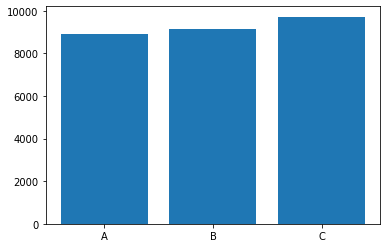

In [92]:

plt.bar(df8.City_Category, df8.Purchase)

Average spending of city 'C' is more than the other cities.

In [93]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

<BarContainer object of 21 artists>

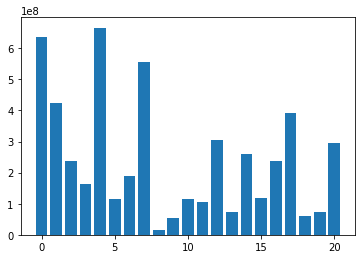

In [102]:
import numpy as np
df9=df.groupby('Occupation').agg('sum')
df9.reset_index(inplace=True)
plt.bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], df9.Purchase)

<BarContainer object of 21 artists>

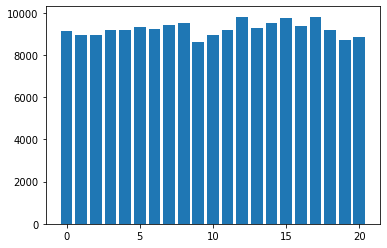

In [103]:
df9=df.groupby('Occupation').mean()
df9.reset_index(inplace=True)
plt.bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], df9.Purchase)